In [9]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from pathlib import Path
import sys
parentDir = Path.cwd().parent
sys.path.insert(0, str(parentDir))

In [2]:
from utils.preprocess import load_ninapro_data

In [3]:
dataPath = parentDir / "data" / "raw" / "ninapro-db2"

In [4]:
subject_number = 17
exercise_number = 1

In [5]:
emg, stimulus, repetition, time, Fs = load_ninapro_data(subject_number=subject_number, exercise_number=exercise_number, dataPath=dataPath)
print("EMG shape:", emg.shape)
print("Unique gestures:", np.unique(stimulus))
print("Repetitions:", np.unique(repetition))

EMG shape: (1804768, 12)
Unique gestures: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Repetitions: [0 1 2 3 4 5 6]


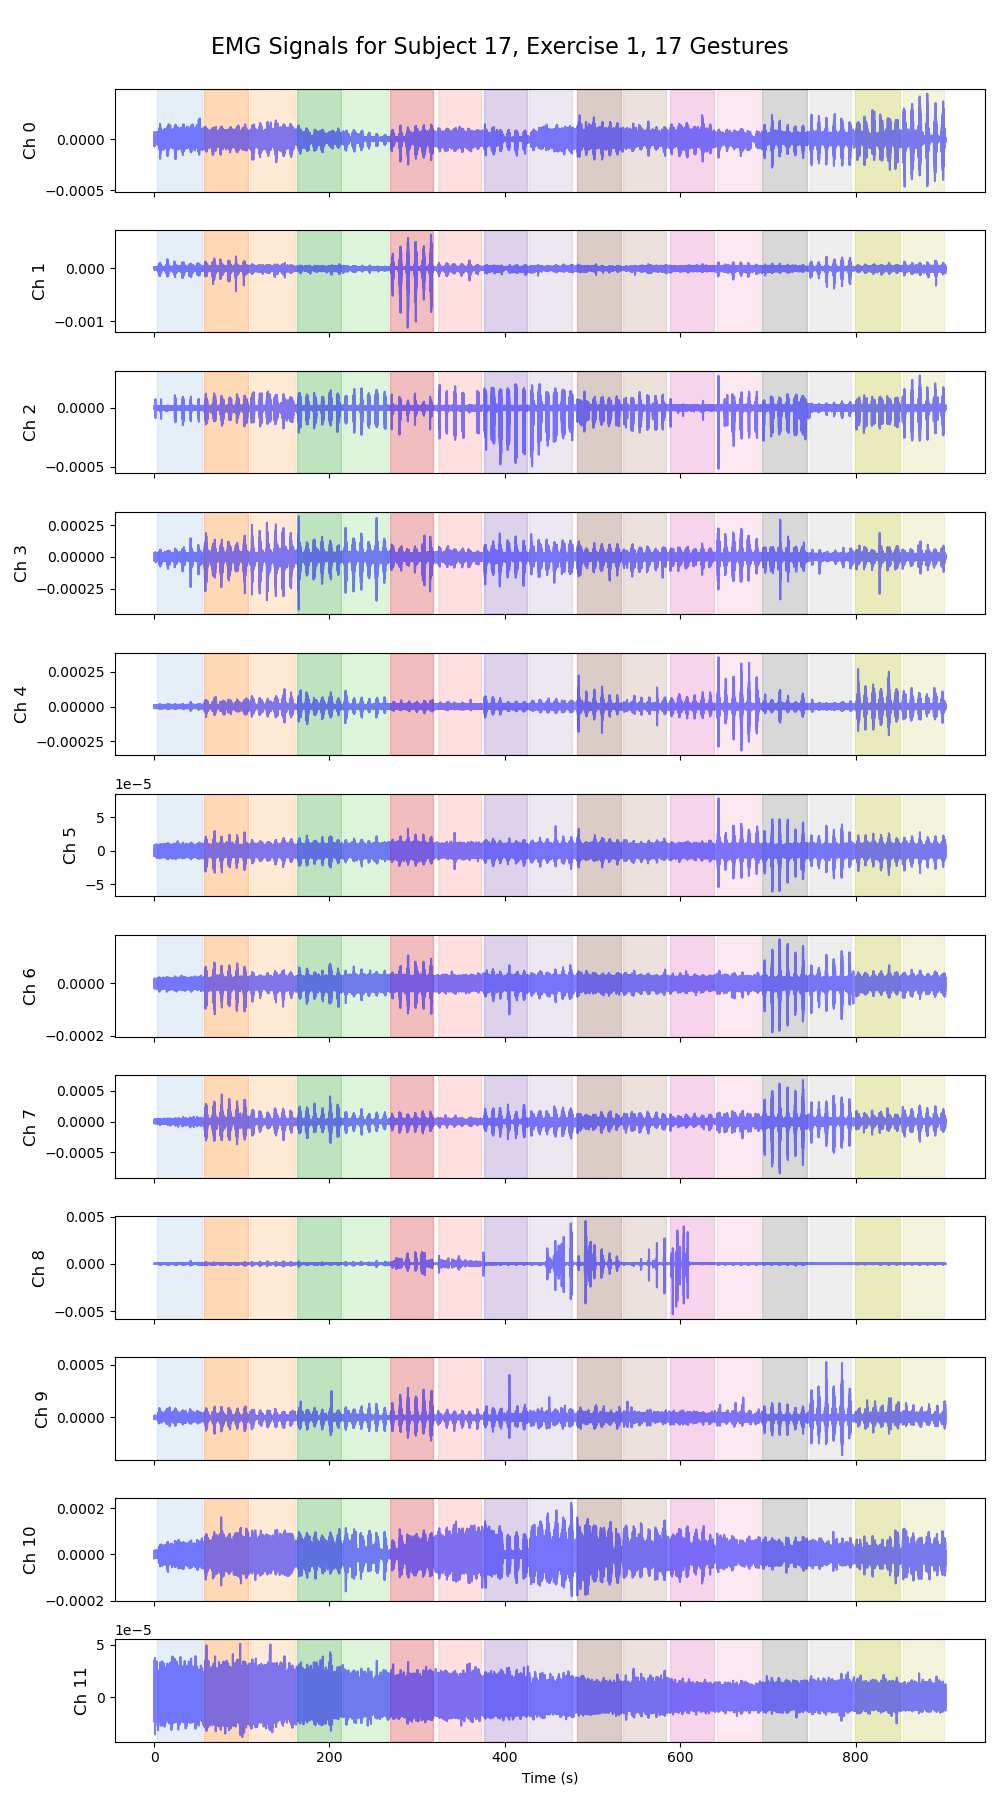

In [35]:
# Check EMG signals plot for all channels with stimulus overlay

time_axis = np.arange(emg.shape[0]) / Fs
fig, axs = plt.subplots(emg.shape[1], 1, figsize=(10, 1.5 * emg.shape[1]), sharex=True)
plt.suptitle(f"EMG Signals for Subject {subject_number}, Exercise {exercise_number}, {len(np.unique(stimulus))-1} Gestures", fontsize=16)
for ch in range(emg.shape[1]):
    # mean_signal = np.mean(emg[:, ch])
    # p5 = np.percentile(emg[:, ch], 5)
    # p95 = np.percentile(emg[:, ch], 95)
    axs[ch].plot(time_axis, emg[:, ch], color='blue', alpha=0.5)
    # axs[ch].hlines([mean_signal, p5, p95], xmin=0, xmax=emg.shape[0] / Fs, colors=['red', 'green', 'green'], linestyles='dashed')
    # Overlay stimulus periods with different colors for each gesture
    for gesture in np.unique(stimulus):
        if gesture == 0:
            continue  # Skip rest
        gesture_indices = np.where(stimulus == gesture)[0]
        if len(gesture_indices) == 0:
            continue
        start_idx = gesture_indices[0]
        end_idx = gesture_indices[-1]
        axs[ch].axvspan(start_idx / Fs, end_idx / Fs, color=plt.cm.tab20(gesture % 20), alpha=0.3)

    axs[ch].set_ylabel(f'Ch {ch}', fontsize=12)
plt.xlabel('Time (s)')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(parentDir / "figs" / f"emg_signals_subject{subject_number}_exercise{exercise_number}.png", dpi=300)
plt.show()
    

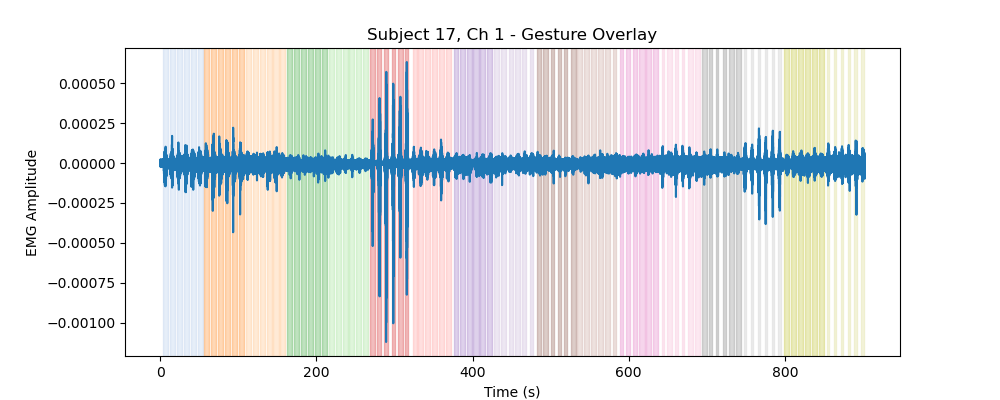

In [39]:
# Check gestures plot for a single channel

channel_to_plot = 1

# plot stimulus gesture
plt.figure(figsize=(10, 4))
plt.plot(time, emg[:, channel_to_plot], label='EMG Channel')

# Plot all gesture repetitions
unique_gestures = np.unique(stimulus)
for gesture_id in unique_gestures:
    if gesture_id == 0:
            continue # Skip rest gesture
    for repetition_id in range(1, 7):  #6 repetitions
        # Find start and end indices of the gesture repetition
        mask = (stimulus == gesture_id) & (repetition == repetition_id)
        if np.any(mask):
            start_idx = np.where(mask)[0][0]
            end_idx = np.where(mask)[0][-1]
        plt.axvspan(time[start_idx], time[end_idx], color=plt.cm.tab20(gesture_id % 20), alpha=0.3, label=f' {gesture_id}')
plt.xlabel('Time (s)')
plt.ylabel('EMG Amplitude')
plt.title(f'Subject {subject_number}, Ch {channel_to_plot} - Gesture Overlay')
plt.savefig(parentDir / "figs" / f"gesture_overlay_subject{subject_number}_channel{channel_to_plot}.png", dpi=300)
plt.show()


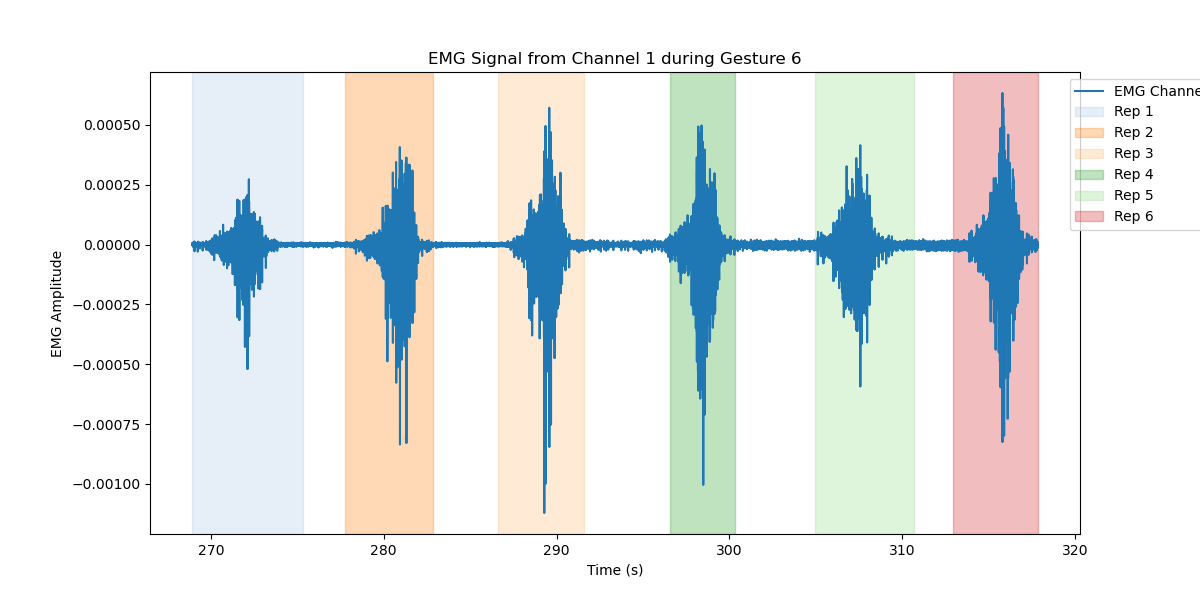

In [37]:
# Check EMG signal for a specific gesture
gesture_to_plot = 6  # Change this to plot different gestures   
indices = np.where((stimulus.flatten() == gesture_to_plot))[0]
startIdx, stopIdx = np.min(indices), np.max(indices)

plt.figure(figsize=(12, 6))
# Plot EMG signal for the specified channel
plt.plot(time[startIdx:stopIdx], emg[startIdx:stopIdx, channel_to_plot], label='EMG Channel')
# Plot all repetitions of the specified gesture
for repetition_id in range(1, 7):  # Assuming 6 repetitions 
    # Find start and end indices of the gesture repetition
    mask = (stimulus == gesture_to_plot) & (repetition == repetition_id)
    if np.any(mask):
        start_idx = np.where(mask)[0][0]
        end_idx = np.where(mask)[0][-1]
        plt.axvspan(time[start_idx], time[end_idx], color=plt.cm.tab20(repetition_id % 20), alpha=0.3, label=f'Rep {repetition_id}')
plt.xlabel('Time (s)')
plt.ylabel('EMG Amplitude')
plt.title(f"EMG Signal from Channel {channel_to_plot} during Gesture {gesture_to_plot}")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.savefig(parentDir / "figs" / f"emg_gesture{gesture_to_plot}_subject{subject_number}_channel{channel_to_plot}.png", dpi=300)
plt.show()

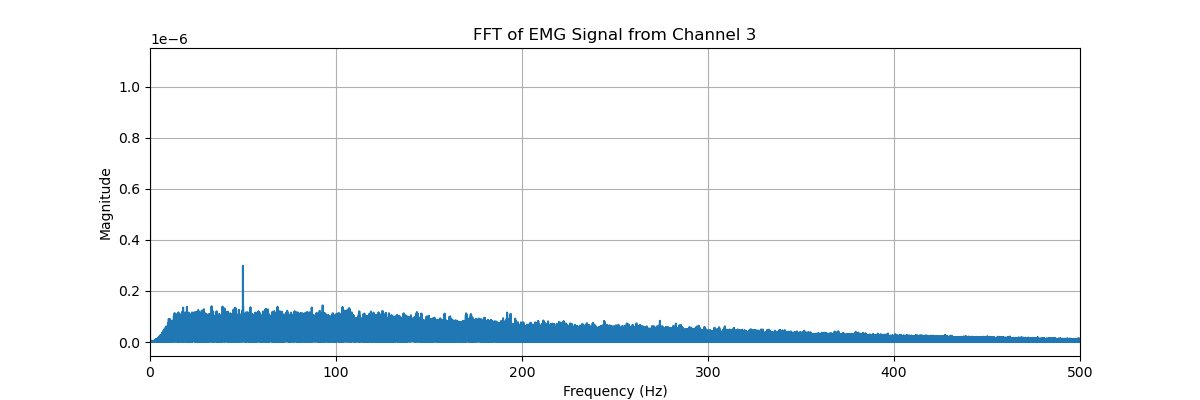

In [25]:
# Plot fft of a channel
channel_to_plot = 2
emg_channel = emg[:, channel_to_plot]
n = len(emg_channel)
emg_fft = np.fft.fft(emg_channel)
emg_fft = np.abs(emg_fft[:n // 2]) * (2 / n)  # Normalize and take positive frequencies
frequencies = np.fft.fftfreq(n, d=1/Fs)[:n // 2]
plt.figure(figsize=(12, 4))
plt.plot(frequencies, emg_fft)
plt.title(f"FFT of EMG Signal from Channel {channel_to_plot + 1}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, 500)  # Limit x-axis to 500 Hz for better visualization
plt.show()

## Conclusions from data exploration
- Some data cleaning is necessary to remove large noise levels
- Power noise @ 50 Hz
- might have to normalize data from each channel and each subject individually